In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.core import Element, Composition
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv", na_filter=False)

In [3]:
train_data = train_data.values.tolist()

In [4]:
train_data = [i[0] for i in train_data]
train_data

['mp-555903',
 'mp-752658',
 'mp-3439',
 'mp-16135',
 'mp-36447',
 'mp-29175',
 'mp-42022',
 'mp-23205',
 'mp-643263',
 'mp-567601',
 'mp-755627',
 'mp-570223',
 'mp-6305',
 'mp-13538',
 'mp-23648',
 'mp-34337',
 'mp-768863',
 'mp-562100',
 'mp-2815',
 'mp-27300',
 'mp-1020633',
 'mp-1040443',
 'mp-607953',
 'mp-697146',
 'mp-11265',
 'mp-867192',
 'mp-753149',
 'mp-1205671',
 'mp-2898',
 'mp-644271',
 'mp-1078709',
 'mp-772232',
 'mp-774639',
 'mp-35759',
 'mp-760729',
 'mp-758241',
 'mp-9330',
 'mp-1207108',
 'mp-6930',
 'mp-1219343',
 'mp-10810',
 'mp-24620',
 'mp-22439',
 'mp-684724',
 'mp-752927',
 'mp-4163',
 'mp-545544',
 'mp-553281',
 'mp-557881',
 'mp-504967',
 'mp-23843',
 'mp-11924',
 'mp-558430',
 'mp-1227238',
 'mp-27442',
 'mp-557082',
 'mp-505139',
 'mp-1216623',
 'mp-7534',
 'mp-1021504',
 'mp-1102430',
 'mp-3486',
 'mp-759495',
 'mp-559798',
 'mp-36526',
 'mp-24018',
 'mp-756365',
 'mp-7991',
 'mp-707249',
 'mp-31488',
 'mp-758949',
 'mp-1247',
 'mp-18300',
 'mp-696752

In [5]:
mpr = MPRester("E9ULqed5nCgGQb6w")
train_data = mpr.query(criteria={'task_id':{'$in':train_data}}, properties=["material_id", "pretty_formula", "diel.poly_total"
                                                                       , "band_gap", "density", "e_above_hull"
                                                                       , "formation_energy_per_atom"])

  0%|          | 0/5619 [00:00<?, ?it/s]

In [6]:
train_data = pd.DataFrame.from_dict(train_data)

In [7]:
train_data["electro_negativity"] = [Composition(c).average_electroneg for c in train_data['pretty_formula']]
train_data["composition"] = [Composition(c).to_data_dict["unit_cell_composition"] for c in train_data["pretty_formula"]]
train_data["num_of_electron"] = [Composition(c).total_electrons for c in train_data["pretty_formula"]]

In [8]:
def average_therm_cond(c):
    unit_cell_composition = c
    numerator = 0
    denominator = 0
    for key, value in unit_cell_composition.items():
        numerator += Element(key).thermal_conductivity * value
        denominator += value
    return numerator / denominator

In [9]:
ave_therm_cond = []
for number in range(5619):
    ave_therm_cond.append(average_therm_cond(train_data["composition"][number]))
    
train_data["ave_therm_cond"] = ave_therm_cond

In [10]:
def average_ionization_eng(c):
    unit_cell_composition = c
    numerator = 0
    denominator = 0
    for key, value in unit_cell_composition.items():
        numerator += Element(key).ionization_energy * value
        denominator += value
    return numerator / denominator

In [11]:
ave_ionization_eng = []
for number in range(5619):
    ave_ionization_eng.append(average_ionization_eng(train_data["composition"][number]))
    
train_data["ave_ionization_energy"] = ave_ionization_eng
train_data.head()

,material_id,pretty_formula,diel.poly_total,band_gap,density,e_above_hull,formation_energy_per_atom,electro_negativity,composition,num_of_electron,ave_therm_cond,ave_ionization_energy
0,mp-1001034,Mg(InSe2)2,14.302811,0.7432,5.030727,0.026713,-0.703661,2.152857,"{'Mg': 1.0, 'In': 2.0, 'Se': 4.0}",246.0,46.582857,8.318359
1,mp-1001780,LuCuS2,15.195311,1.5031,6.400668,0.000000,-1.699567,2.082500,"{'Lu': 1.0, 'Cu': 1.0, 'S': 2.0}",132.0,104.102500,8.468068
2,mp-1001786,LiScS2,21.142450,1.5296,2.687084,0.000000,-2.103385,1.875000,"{'Li': 1.0, 'Sc': 1.0, 'S': 2.0}",56.0,25.352500,8.168306
3,mp-1002124,HfC,23.954680,0.5774,9.868236,0.641422,-0.298402,1.925000,"{'Hf': 1.0, 'C': 1.0}",78.0,81.500000,9.042679
4,mp-1004528,CsB3PbF12,7.820133,6.3125,3.068458,0.000000,-3.162482,3.352941,"{'Cs': 1.0, 'B': 3.0, 'Pb': 1.0, 'F': 12.0}",260.0,8.960729,14.428146


In [12]:
test_data = pd.read_csv("test.csv", na_filter=False)

In [13]:
test_data = test_data.values.tolist()

In [14]:
test_data = [i[0] for i in test_data]

In [15]:
test_data = mpr.query(criteria={'task_id':{'$in':test_data}}, properties=["material_id", "pretty_formula", "diel.poly_total"
                                                                       , "band_gap", "density", "e_above_hull"
                                                                       , "formation_energy_per_atom"])

  0%|          | 0/1400 [00:00<?, ?it/s]

In [16]:
test_data = pd.DataFrame.from_dict(test_data)
test_data["electro_negativity"] = [Composition(c).average_electroneg for c in test_data['pretty_formula']]
test_data["composition"] = [Composition(c).to_data_dict["unit_cell_composition"] for c in test_data["pretty_formula"]]
test_data["num_of_electron"] = [Composition(c).total_electrons for c in test_data["pretty_formula"]]

In [17]:
ave_therm_cond_t = []
for number in range(1400):
    ave_therm_cond_t.append(average_therm_cond(test_data["composition"][number]))
    
test_data["ave_therm_cond"] = ave_therm_cond_t

In [18]:
ave_ionization_eng_t = []
for number in range(1400):
    ave_ionization_eng_t.append(average_ionization_eng(test_data["composition"][number]))
    
test_data["ave_ionization_energy"] = ave_ionization_eng_t
test_data.head()

,material_id,pretty_formula,diel.poly_total,band_gap,density,e_above_hull,formation_energy_per_atom,electro_negativity,composition,num_of_electron,ave_therm_cond,ave_ionization_energy
0,mp-1000,BaTe,13.189482,1.8555,4.937886,0.000000,-1.792337,1.495000,"{'Ba': 1.0, 'Te': 1.0}",108.0,10.500000,7.110736
1,mp-10044,BAs,9.939244,1.2522,5.087631,0.080167,-0.019233,2.110000,"{'B': 1.0, 'As': 1.0}",38.0,38.500000,9.043285
2,mp-10086,YSF,17.563757,1.3137,4.685387,0.000000,-3.359731,2.593333,"{'Y': 1.0, 'S': 1.0, 'F': 1.0}",64.0,5.744233,11.333363
3,mp-1008858,NdBiPd,27.751030,0.0900,9.427722,0.000000,-0.944922,1.786667,"{'Nd': 1.0, 'Bi': 1.0, 'Pd': 1.0}",189.0,32.333333,7.049118
4,mp-1008867,NaCuO,5.028730,0.0017,4.445388,0.539694,-0.701211,2.090000,"{'Na': 1.0, 'Cu': 1.0, 'O': 1.0}",48.0,180.008860,8.827837


In [19]:
# Exploratory 

In [20]:
x = train_data[["band_gap", "density", "e_above_hull", "formation_energy_per_atom", "electro_negativity", "num_of_electron"]]
y = train_data["diel.poly_total"]

diel.poly_total : MEAN = 15.60416371485569 STD = 13.368852623506026


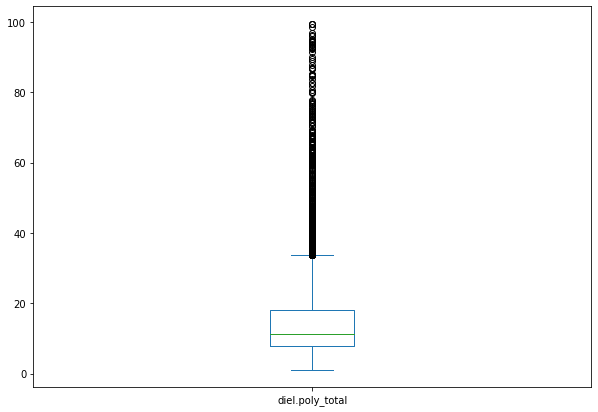

In [21]:
fig = plt.figure(figsize =(10, 7))
y.plot.box()
print("diel.poly_total :", "MEAN =", y.mean(), "STD =", y.std())

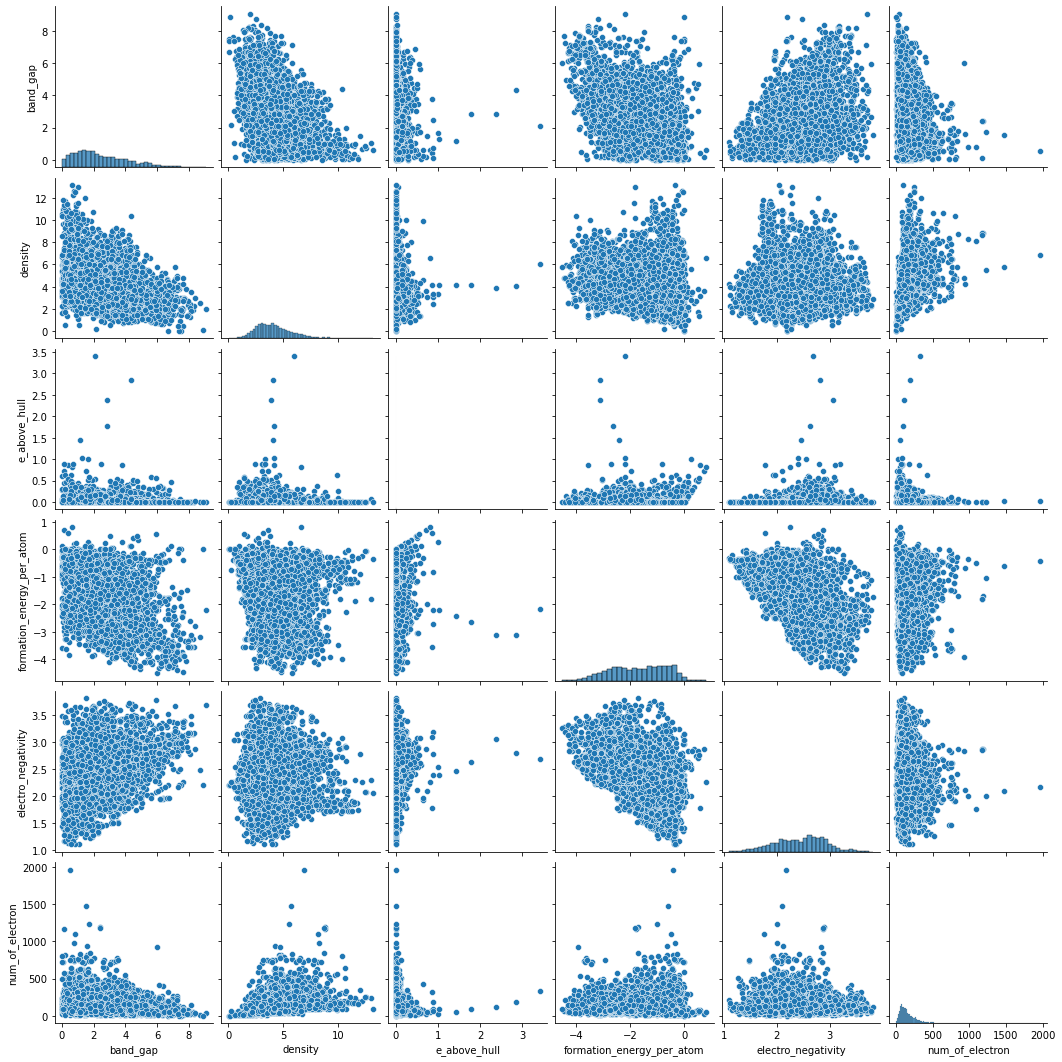

In [22]:
# Look at the correlations b/t facotrs I got
grid = sns.pairplot(x)

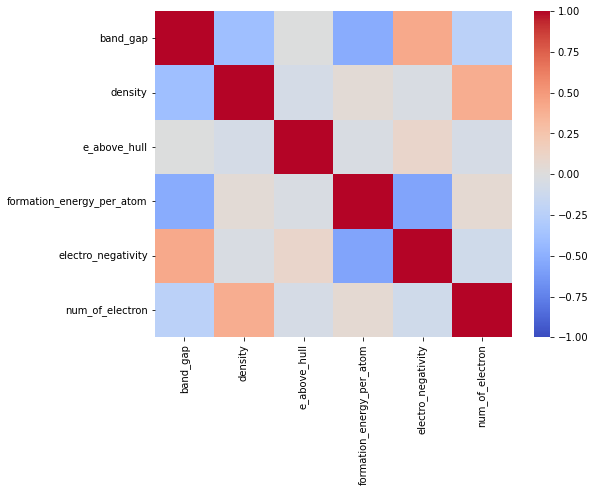

In [23]:
# Correlation plot
f, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(x.corr(), cmap = "coolwarm", vmin = -1, vmax = 1, ax = ax);

In [24]:
# PCA

In [25]:
train_x_pca = train_data[["band_gap", "density", "e_above_hull", "formation_energy_per_atom", 
                          "electro_negativity", "num_of_electron"]]
train_y_pca = train_data["diel.poly_total"]

In [26]:
from sklearn.preprocessing import StandardScaler

train_x_pca = StandardScaler().fit_transform(train_x_pca)

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_x_pca)
train_x_pca = pca.transform(train_x_pca)
print(pca.explained_variance_)

[2.17420311 1.33997584 1.00597712 0.67336927 0.44546331 0.36207936]


In [28]:
d = {'PC1' : train_x_pca[:, 0], 'PC2' : train_x_pca[:, 1]}
df_train_x_pca = pd.DataFrame(data = d)
df_train_x_pca

,PC1,PC2
0,1.756192,0.097172
1,1.066165,0.383312
2,0.198513,-1.281967
3,2.219536,0.203020
4,-2.906250,1.318812
...,...,...
5614,0.185415,0.073032
5615,-0.435340,-0.027667
5616,-0.680720,0.284968
5617,-1.114271,0.694916


In [29]:
# Linear regression
# Use only bandgap to predict dielectric constant

Text(0, 0.5, 'dielectric constant')

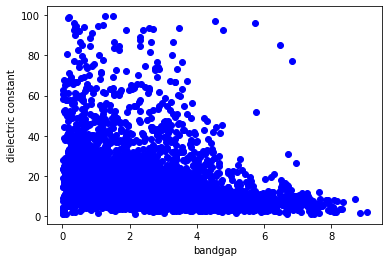

In [30]:
plt.scatter(train_data["band_gap"], train_data["diel.poly_total"], color="blue")
plt.xlabel("bandgap")
plt.ylabel("dielectric constant")

In [31]:
# Split
train_xlm = train_data["band_gap"]
train_ylm = train_data["diel.poly_total"]
test_xlm = test_data["band_gap"]
test_ylm = test_data["diel.poly_total"]

In [32]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_xlm = np.array(train_xlm)
train_ylm = np.array(train_ylm)
train_xlm = train_xlm.reshape(-1, 1)
train_ylm = train_ylm.reshape(-1, 1)

regr.fit(train_xlm, train_ylm)

LinearRegression()

Dielectric const = 21.678, + -2.445 * bandgap


Text(0.5, 0, 'Bandgap')

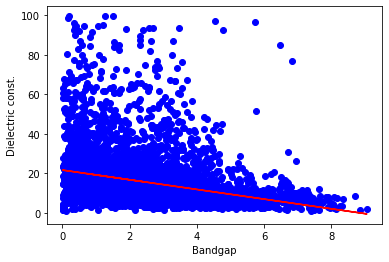

In [33]:
plt.scatter(train_xlm, train_ylm, color="blue")
plt.plot(train_xlm, regr.coef_*train_xlm + regr.intercept_, '-r')

print("Dielectric const = %.3f, + %.3f * bandgap" %(regr.intercept_, regr.coef_))
plt.ylabel("Dielectric const.")
plt.xlabel("Bandgap")

In [34]:
test_xlm = np.array(test_xlm)
test_xlm = test_xlm.reshape(-1, 1)
test_ylm = np.array(test_ylm)
test_ylm = test_ylm.reshape(-1, 1)
pred_ylm = regr.predict(test_xlm)

In [35]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(pred_ylm - test_ylm)))

Mean absolute error: 7.63


In [36]:
pred_ylm

array([[17.14145392],
       [18.61655825],
       [18.4661871 ],
       ...,
       [12.62665176],
       [18.62022584],
       [16.62261232]])

In [37]:
predict_lm = test_data["material_id"]
predict_lm = pd.DataFrame.from_dict(predict_lm)
pred_ylm = pd.DataFrame.from_dict(pred_ylm)

In [38]:
predict_lm["dielectric_poly_total"] = pred_ylm

In [39]:
predict_lm

,material_id,dielectric_poly_total
0,mp-1000,17.141454
1,mp-10044,18.616558
2,mp-10086,18.466187
3,mp-1008858,21.458206
4,mp-1008867,21.674105
...,...,...
1395,mvc-5908,17.741471
1396,mvc-5921,16.081032
1397,mvc-7386,12.626652
1398,mvc-7701,18.620226


In [40]:
csv_lm = predict_lm[["material_id" ,"dielectric_poly_total"]]
csv_lm.to_csv('csv_lm.csv')

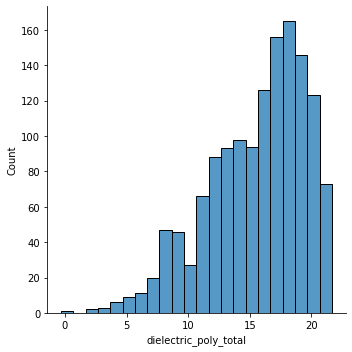

In [41]:
sns.displot(csv_lm, x = "dielectric_poly_total")

In [42]:
# Multiple features LinearRegression
# Split

train_mx = train_data[["band_gap", "density", "e_above_hull", "formation_energy_per_atom", "electro_negativity", 
                       "num_of_electron"]]
train_my = train_data["diel.poly_total"]
test_mx = test_data[["band_gap", "density", "e_above_hull", "formation_energy_per_atom", "electro_negativity", 
                     "num_of_electron"]]
test_my = test_data["diel.poly_total"]

In [43]:
regr.fit(train_mx, train_my)
pred_test_mlry = regr.predict(test_mx)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(pred_test_mlry, test_my)
print("MAE =", '%.3f' % mae)

MAE = 6.511


In [44]:
pred_test_mlry

array([22.73537948, 18.22080099, 19.98470732, ...,  8.9708152 ,
       22.18154885, 18.49989256])

In [45]:
predict_mlr = test_data["material_id"]
predict_mlr = pd.DataFrame.from_dict(predict_mlr)
pred_mlry = pd.DataFrame.from_dict(pred_test_mlry)

In [46]:
predict_mlr["dielectric_poly_total"] = pred_mlry
predict_mlr

,material_id,dielectric_poly_total
0,mp-1000,22.735379
1,mp-10044,18.220801
2,mp-10086,19.984707
3,mp-1008858,36.317360
4,mp-1008867,19.405127
...,...,...
1395,mvc-5908,21.883081
1396,mvc-5921,18.755527
1397,mvc-7386,8.970815
1398,mvc-7701,22.181549


In [47]:
csv_mlr = predict_mlr[["material_id" ,"dielectric_poly_total"]]
csv_mlr.to_csv('csv_mlr.csv')

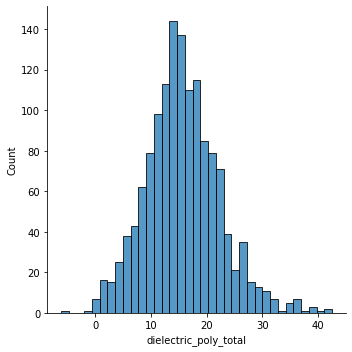

In [48]:
sns.displot(csv_mlr, x="dielectric_poly_total")

In [49]:
# Ridge Regression

In [50]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = 0.1)
ridge.fit(train_mx, train_my)
pred_test_rdy = ridge.predict(test_mx)

ridge_mae = mean_absolute_error(pred_test_rdy, test_my)
print("MAE =", '%.3f' % ridge_mae)

MAE = 6.511


In [51]:
predict_rdy = test_data["material_id"]
predict_rdy = pd.DataFrame.from_dict(predict_rdy)
pred_rdy = pd.DataFrame.from_dict(pred_test_rdy)
predict_rdy["dielectric_poly_total"] = pred_rdy
predict_rdy

,material_id,dielectric_poly_total
0,mp-1000,22.734786
1,mp-10044,18.220683
2,mp-10086,19.984606
3,mp-1008858,36.316974
4,mp-1008867,19.403623
...,...,...
1395,mvc-5908,21.882994
1396,mvc-5921,18.755275
1397,mvc-7386,8.971047
1398,mvc-7701,22.181615


In [52]:
csv_rd = predict_rdy[["material_id" ,"dielectric_poly_total"]]
csv_rd.to_csv('csv_rd.csv')

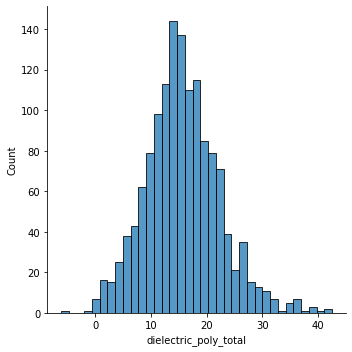

In [53]:
sns.displot(csv_rd, x="dielectric_poly_total")

In [54]:
# LASSO

In [55]:
lasso = Lasso(alpha = 0.1)
lasso.fit(train_mx, train_my)
pred_test_lasy = lasso.predict(test_mx)

l_mae = mean_absolute_error(pred_test_lasy, test_my)

print("MAE =", '%.3f' % l_mae)

MAE = 6.510


In [56]:
predict_las = test_data["material_id"]
predict_las = pd.DataFrame.from_dict(predict_las)
pred_las = pd.DataFrame.from_dict(pred_test_lasy)
predict_las["dielectric_poly_total"] = pred_las
predict_las

,material_id,dielectric_poly_total
0,mp-1000,21.861644
1,mp-10044,18.326403
2,mp-10086,19.460348
3,mp-1008858,35.795263
4,mp-1008867,18.549028
...,...,...
1395,mvc-5908,21.605214
1396,mvc-5921,18.601047
1397,mvc-7386,9.401676
1398,mvc-7701,22.284206


In [57]:
csv_las = predict_las[["material_id" ,"dielectric_poly_total"]]
csv_las.to_csv('csv_las.csv')

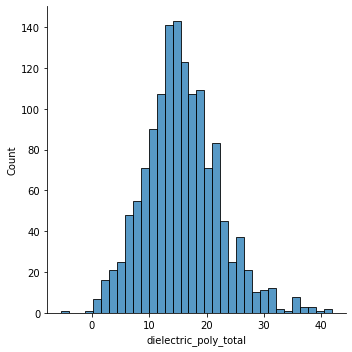

In [58]:
sns.displot(csv_las, x="dielectric_poly_total")

In [59]:
# Decision tree

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.tree import export_text, export_graphviz

In [61]:
x_train = train_data[["band_gap", "density", "e_above_hull", "formation_energy_per_atom", "electro_negativity", 
                       "num_of_electron"]]
y_train = train_data["diel.poly_total"]
x_test = test_data[["band_gap", "density", "e_above_hull", "formation_energy_per_atom", "electro_negativity", 
                     "num_of_electron"]]
y_test = test_data["diel.poly_total"]

In [62]:
decision_tree = DecisionTreeRegressor(criterion="mae", random_state=0, max_depth=15, ccp_alpha=0.01)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r = export_text(decision_tree, feature_names=list(x_train.columns))
print("MAE = %.3f" % (mae))
print(r)

MAE = 5.912
|--- density <= 4.79
|   |--- band_gap <= 2.47
|   |   |--- band_gap <= 0.93
|   |   |   |--- electro_negativity <= 2.13
|   |   |   |   |--- density <= 3.35
|   |   |   |   |   |--- value: [13.99]
|   |   |   |   |--- density >  3.35
|   |   |   |   |   |--- band_gap <= 0.28
|   |   |   |   |   |   |--- electro_negativity <= 1.56
|   |   |   |   |   |   |   |--- value: [40.07]
|   |   |   |   |   |   |--- electro_negativity >  1.56
|   |   |   |   |   |   |   |--- value: [23.82]
|   |   |   |   |   |--- band_gap >  0.28
|   |   |   |   |   |   |--- value: [18.41]
|   |   |   |--- electro_negativity >  2.13
|   |   |   |   |--- density <= 3.33
|   |   |   |   |   |--- value: [8.72]
|   |   |   |   |--- density >  3.33
|   |   |   |   |   |--- e_above_hull <= 0.01
|   |   |   |   |   |   |--- value: [10.63]
|   |   |   |   |   |--- e_above_hull >  0.01
|   |   |   |   |   |   |--- value: [14.89]
|   |   |--- band_gap >  0.93
|   |   |   |--- electro_negativity <= 2.47
|   | 

In [63]:
y_pred = pd.DataFrame(y_pred)

In [64]:
predict_tree = test_data["material_id"]
predict_tree = pd.DataFrame.from_dict(predict_tree)
pred_tree = pd.DataFrame.from_dict(y_pred)
predict_tree["dielectric_poly_total"] = pred_tree
predict_tree

,material_id,dielectric_poly_total
0,mp-1000,24.259467
1,mp-10044,13.919611
2,mp-10086,28.285960
3,mp-1008858,24.823000
4,mp-1008867,23.819397
...,...,...
1395,mvc-5908,21.419069
1396,mvc-5921,11.945709
1397,mvc-7386,7.354391
1398,mvc-7701,26.237119


In [65]:
csv_tree = predict_tree[["material_id" ,"dielectric_poly_total"]]
csv_tree.to_csv('csv_tree.csv')

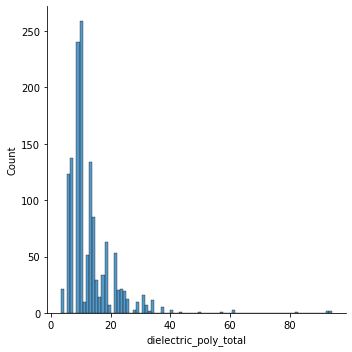

In [66]:
sns.displot(csv_tree, x="dielectric_poly_total")

In [67]:
# Decision Tree2

In [68]:
x2_train = train_data[["band_gap", "density", "e_above_hull", "formation_energy_per_atom", "electro_negativity", 
                       "num_of_electron", "ave_therm_cond", "ave_ionization_energy"]]
y2_train = train_data["diel.poly_total"]
x2_test = test_data[["band_gap", "density", "e_above_hull", "formation_energy_per_atom", "electro_negativity", 
                       "num_of_electron", "ave_therm_cond", "ave_ionization_energy"]]
y2_test = test_data["diel.poly_total"]

In [69]:
decision_tree = DecisionTreeRegressor(criterion="mae", random_state=0, max_depth=15, ccp_alpha=0.01)
decision_tree.fit(x2_train, y2_train)
y2_pred = decision_tree.predict(x2_test)
mae = mean_absolute_error(y2_test, y2_pred)
r = export_text(decision_tree, feature_names=list(x2_train.columns))
print("MAE = %.3f" % (mae))
print(r)

MAE = 5.689
|--- density <= 4.79
|   |--- band_gap <= 2.47
|   |   |--- band_gap <= 0.93
|   |   |   |--- electro_negativity <= 2.13
|   |   |   |   |--- density <= 3.35
|   |   |   |   |   |--- value: [13.99]
|   |   |   |   |--- density >  3.35
|   |   |   |   |   |--- band_gap <= 0.28
|   |   |   |   |   |   |--- electro_negativity <= 1.56
|   |   |   |   |   |   |   |--- value: [40.07]
|   |   |   |   |   |   |--- electro_negativity >  1.56
|   |   |   |   |   |   |   |--- value: [23.82]
|   |   |   |   |   |--- band_gap >  0.28
|   |   |   |   |   |   |--- value: [18.41]
|   |   |   |--- electro_negativity >  2.13
|   |   |   |   |--- density <= 3.33
|   |   |   |   |   |--- value: [8.72]
|   |   |   |   |--- density >  3.33
|   |   |   |   |   |--- e_above_hull <= 0.01
|   |   |   |   |   |   |--- value: [10.63]
|   |   |   |   |   |--- e_above_hull >  0.01
|   |   |   |   |   |   |--- value: [14.89]
|   |   |--- band_gap >  0.93
|   |   |   |--- ave_ionization_energy <= 12.98
| 

In [70]:
y2_pred = pd.DataFrame(y2_pred)
predict_tree2 = test_data["material_id"]
predict_tree2 = pd.DataFrame.from_dict(predict_tree2)
pred2_tree = pd.DataFrame.from_dict(y2_pred)
predict_tree2["dielectric_poly_total"] = pred2_tree
predict_tree2

,material_id,dielectric_poly_total
0,mp-1000,24.259467
1,mp-10044,12.912110
2,mp-10086,28.686096
3,mp-1008858,24.017866
4,mp-1008867,23.819397
...,...,...
1395,mvc-5908,21.419069
1396,mvc-5921,12.024523
1397,mvc-7386,7.354391
1398,mvc-7701,26.237119


In [71]:
csv_tree2 = predict_tree2[["material_id" ,"dielectric_poly_total"]]
csv_tree2.to_csv('csv_tree2.csv')

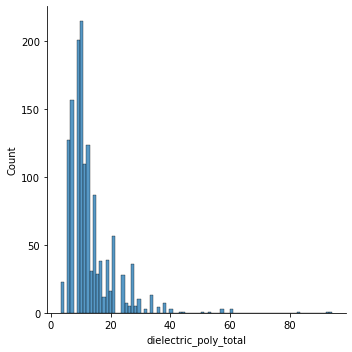

In [72]:
sns.displot(csv_tree2, x="dielectric_poly_total")

In [73]:
# Choose factors related with energy and electrical properties

In [74]:
x3_train = train_data[["band_gap", "e_above_hull", "electro_negativity", "num_of_electron"]]
y3_train = train_data["diel.poly_total"]
x3_test = test_data[["band_gap", "e_above_hull", "electro_negativity", "num_of_electron"]]
y3_test = test_data["diel.poly_total"]

In [75]:
decision_tree = DecisionTreeRegressor(criterion="mae", random_state=0, max_depth=15, ccp_alpha=0.01)
decision_tree.fit(x3_train, y3_train)
y3_pred = decision_tree.predict(x3_test)
mae = mean_absolute_error(y3_test, y3_pred)
r = export_text(decision_tree, feature_names=list(x3_train.columns))
print("MAE = %.3f" % (mae))
print(r)

MAE = 6.593
|--- band_gap <= 1.35
|   |--- electro_negativity <= 2.38
|   |   |--- band_gap <= 0.59
|   |   |   |--- electro_negativity <= 2.20
|   |   |   |   |--- num_of_electron <= 679.50
|   |   |   |   |   |--- num_of_electron <= 218.50
|   |   |   |   |   |   |--- value: [25.88]
|   |   |   |   |   |--- num_of_electron >  218.50
|   |   |   |   |   |   |--- band_gap <= 0.58
|   |   |   |   |   |   |   |--- num_of_electron <= 531.00
|   |   |   |   |   |   |   |   |--- electro_negativity <= 2.11
|   |   |   |   |   |   |   |   |   |--- value: [20.61]
|   |   |   |   |   |   |   |   |--- electro_negativity >  2.11
|   |   |   |   |   |   |   |   |   |--- num_of_electron <= 252.00
|   |   |   |   |   |   |   |   |   |   |--- value: [86.51]
|   |   |   |   |   |   |   |   |   |--- num_of_electron >  252.00
|   |   |   |   |   |   |   |   |   |   |--- value: [13.46]
|   |   |   |   |   |   |   |--- num_of_electron >  531.00
|   |   |   |   |   |   |   |   |--- value: [32.10]
|   |   |

In [76]:
y3_pred = pd.DataFrame(y3_pred)
predict_tree3 = test_data["material_id"]
predict_tree3 = pd.DataFrame.from_dict(predict_tree3)
pred3_tree = pd.DataFrame.from_dict(y3_pred)
predict_tree3["dielectric_poly_total"] = pred3_tree
predict_tree3

,material_id,dielectric_poly_total
0,mp-1000,11.750235
1,mp-10044,13.697309
2,mp-10086,11.884796
3,mp-1008858,25.878334
4,mp-1008867,25.878334
...,...,...
1395,mvc-5908,16.656364
1396,mvc-5921,16.656364
1397,mvc-7386,10.367874
1398,mvc-7701,11.884796


In [77]:
csv_tree3 = predict_tree3[["material_id" ,"dielectric_poly_total"]]
csv_tree3.to_csv('csv_tree3.csv')

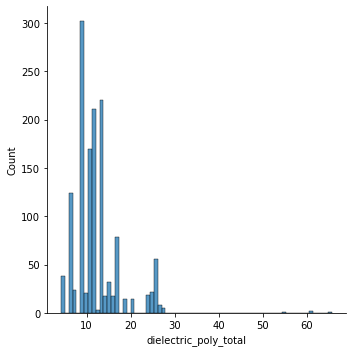

In [78]:
sns.displot(csv_tree3, x="dielectric_poly_total")